<a href="https://colab.research.google.com/github/23ft/Digital-Modulation-Python/blob/main/16QAM_modulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

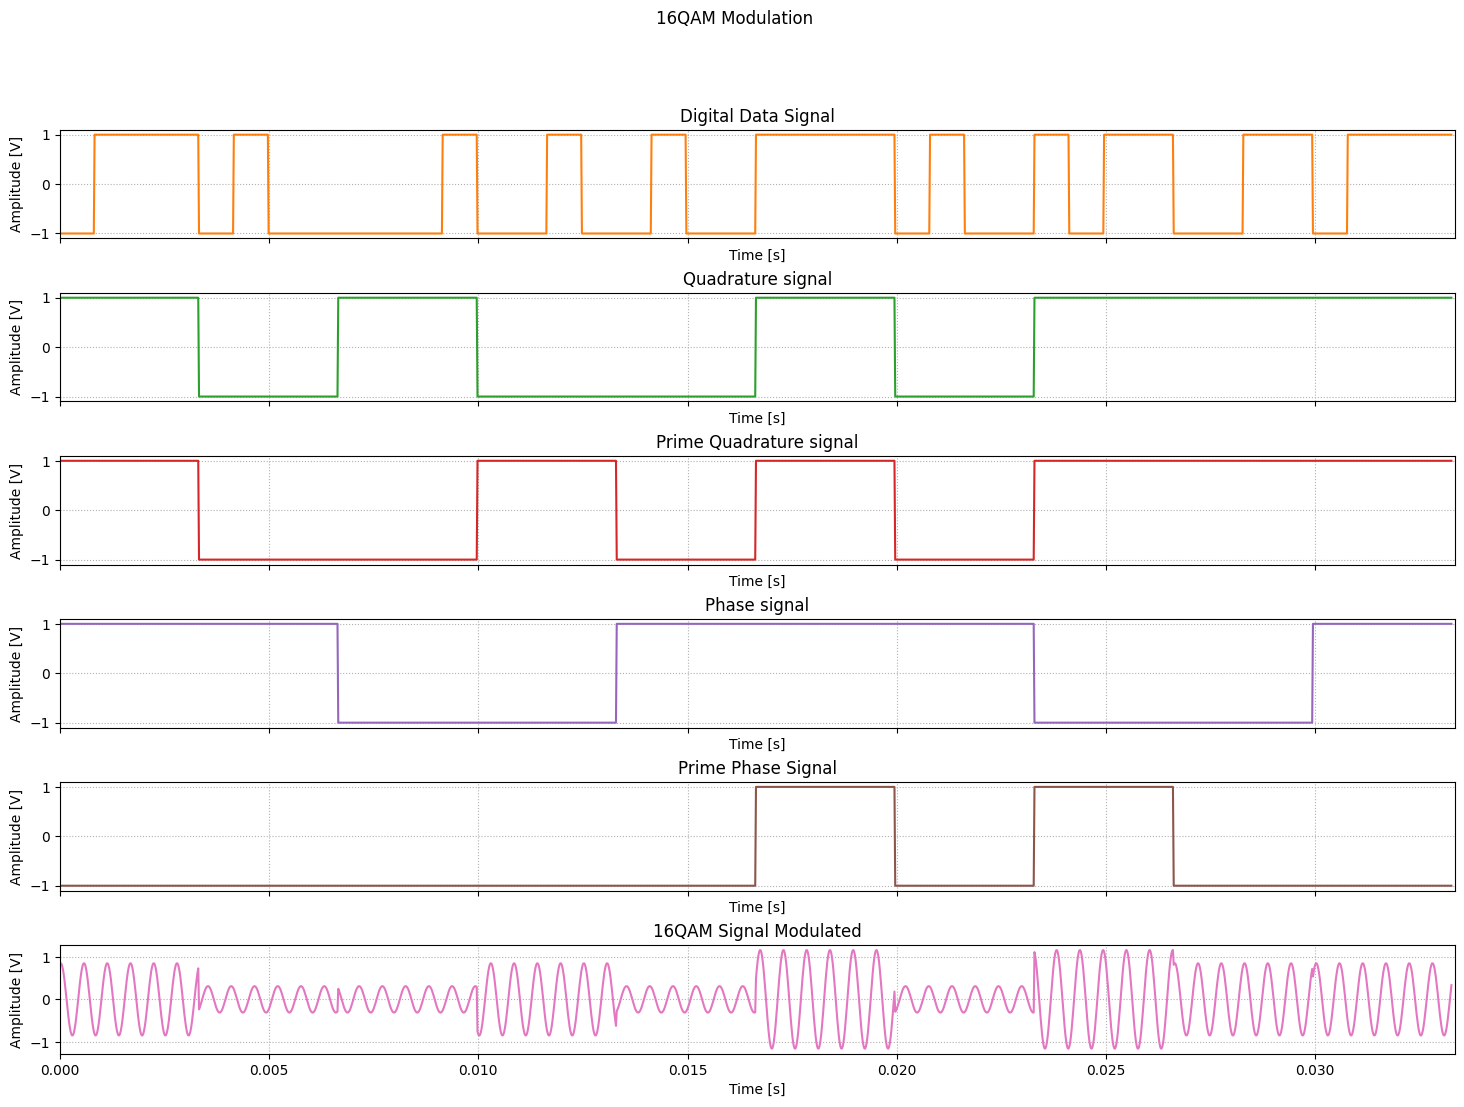

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sys
import math
from numpy import pi, sqrt, sin, cos, zeros, r_
global outSignal

""" Configuracion """
fs = 54100                  # sampling rate - samples/sec - puls/sec
baud = 1200                  # symbol rate - bits/sec
Nbits = 40                  # number of bits
f0 = 1800                   # carrier Frequency
Ns = int(fs/baud)           # number of Samples per Symbol - samples/bit
N = Nbits * Ns              # Total Number of Samples
t = r_[0.0:N]/fs            # time points

# Rango para bits y tiempo para visualizacion 
symbolsToShow = 60
timeDomainVisibleLimit = np.minimum(Nbits/baud,symbolsToShow/baud)  

# Tren pulsos entrada.
inputBits = np.random.randn(Nbits,1) > 0 
inputSignal = (np.tile(inputBits*2-1,(1,Ns))).ravel() # se multiplica el numero de columnas por el numero de samples por bit en np.tile.

# combinaciones 16QAM -- {wayne tomasi}
out16QAM = [[0.311, -3*pi/4], # -135
 [0.850, -11*pi/12], # -165
 [0.311, -pi/4],     # -45
 [0.850, -pi/12],    # -15
 [0.850, -7*pi/12],  # -105
 [1.161, -3*pi/4],   # -135
 [0.850, -5*pi/12],  # -75
 [1.161, -pi/4],     # -45
 [0.311, 3*pi/4],
 [0.850, 11*pi/12], # 165
 [0.311, pi/4],     # 45
 [0.850, pi/12],    # 15
 [0.850, 7*pi/12],  # 105
 [1.161, 3*pi/4],   # 135
 [0.850, 5*pi/12],  # 75
 [1.161, pi/4]]     # 45
outSignal = np.zeros(shape=1)

# Handler generador out signal.
def hand16QAM(trueTablePos, t0, tf, ):
  global outSignal
  outSignal = np.concatenate( (outSignal, out16QAM[trueTablePos][0]*sin(2*pi*f0*t[t_inf:t_sup] + out16QAM[trueTablePos][1])) )

""" 16QAM MODULATOR. """
if (inputBits.size%4 == 0):
  """ Divisor de bits """
  Ip_bits = inputBits[::4]
  I_bits = inputBits[1::4]
  Qp_bits = inputBits[2::4]
  Q_bits = inputBits[3::4]

  Q_signal = (np.tile(Q_bits*2-1,(1,4*Ns))).ravel()
  Qp_signal = (np.tile(Qp_bits*2-1,(1,4*Ns))).ravel()
  I_signal = (np.tile(I_bits*2-1,(1,4*Ns))).ravel()
  Ip_signal = (np.tile(Ip_bits*2-1,(1,4*Ns))).ravel()
  
  """ cambiador de 2 a 4 niveles  y  Modulador producto"""
  for x in range(0,int(Nbits/4), 1):
    # garantizando indexar array  en base a el Ns (samples/bit)
    if x == 0:
      t_inf = 0
      t_sup = Ns*4
    else:
      t_inf = t_sup
      t_sup = t_inf + (Ns*4)

    hand16QAM(0, t_inf, t_sup) if ((not Q_bits[x]) and (not Qp_bits[x]) and (not I_bits[x]) and (not Ip_bits[x])) else None
    hand16QAM(1, t_inf, t_sup) if ((not Q_bits[x]) and (not Qp_bits[x]) and (not I_bits[x]) and (Ip_bits[x])) else None
    hand16QAM(2, t_inf, t_sup) if ((not Q_bits[x]) and (not Qp_bits[x]) and (I_bits[x]) and (not Ip_bits[x])) else None
    hand16QAM(3, t_inf, t_sup) if ((not Q_bits[x]) and (not Qp_bits[x]) and (I_bits[x]) and (Ip_bits[x])) else None
    hand16QAM(4, t_inf, t_sup) if ((not Q_bits[x]) and (Qp_bits[x]) and (not I_bits[x]) and (not Ip_bits[x])) else None
    hand16QAM(5, t_inf, t_sup) if ((not Q_bits[x]) and (Qp_bits[x]) and (not I_bits[x]) and (Ip_bits[x])) else None     
    hand16QAM(6, t_inf, t_sup) if ((not Q_bits[x]) and (Qp_bits[x]) and (I_bits[x]) and (not Ip_bits[x])) else None
    hand16QAM(7, t_inf, t_sup) if ((not Q_bits[x]) and (Qp_bits[x]) and (I_bits[x]) and (Ip_bits[x])) else None
    hand16QAM(8, t_inf, t_sup) if ((Q_bits[x]) and (not Qp_bits[x]) and (not I_bits[x]) and (not Ip_bits[x])) else None
    hand16QAM(9, t_inf, t_sup) if ((Q_bits[x]) and (not Qp_bits[x]) and (not I_bits[x]) and (Ip_bits[x])) else None
    hand16QAM(10, t_inf, t_sup) if ((Q_bits[x]) and (not Qp_bits[x]) and (I_bits[x]) and (not Ip_bits[x])) else None
    hand16QAM(11, t_inf, t_sup) if ((Q_bits[x]) and (not Qp_bits[x]) and (I_bits[x]) and (Ip_bits[x])) else None
    hand16QAM(12, t_inf, t_sup) if ((Q_bits[x]) and (Qp_bits[x]) and (not I_bits[x]) and (not Ip_bits[x])) else None
    hand16QAM(13, t_inf, t_sup) if ((Q_bits[x]) and (Qp_bits[x]) and (not I_bits[x]) and (Ip_bits[x])) else None
    hand16QAM(14, t_inf, t_sup) if ((Q_bits[x]) and (Qp_bits[x]) and (I_bits[x]) and (not Ip_bits[x])) else None
    hand16QAM(15, t_inf, t_sup) if ((Q_bits[x]) and (Qp_bits[x]) and (I_bits[x]) and (Ip_bits[x])) else None
    
  """ Graficacion Q-I-C """
  fig, axis = plt.subplots(6,1,sharex='col')
  fig.suptitle('16QAM Modulation', fontsize=12)

  axis[0].plot(t, inputSignal, color='C1')
  #axis[0].set_title('Digital Data Signal (Source Code/ Block Diagram: "inputBits")')
  axis[0].set_title('Digital Data Signal')
  axis[0].set_xlabel('Time [s]')
  axis[0].set_ylabel('Amplitude [V]')
  axis[0].set_xlim(0,timeDomainVisibleLimit)
  axis[0].grid(linestyle='dotted')

  axis[1].plot(t, Q_signal, color='C2')
  #axis[0].set_title('Digital Data Signal (Source Code/ Block Diagram: "inputBits")')
  axis[1].set_title('Quadrature signal')
  axis[1].set_xlabel('Time [s]')
  axis[1].set_ylabel('Amplitude [V]')
  axis[1].set_xlim(0,timeDomainVisibleLimit)
  axis[1].grid(linestyle='dotted')

  axis[2].plot(t, Qp_signal, color='C3')
  #axis[0].set_title('Digital Data Signal (Source Code/ Block Diagram: "inputBits")')
  axis[2].set_title('Prime Quadrature signal')
  axis[2].set_xlabel('Time [s]')
  axis[2].set_ylabel('Amplitude [V]')
  axis[2].set_xlim(0,timeDomainVisibleLimit)
  axis[2].grid(linestyle='dotted')

  axis[3].plot(t, I_signal, color='C4')
  #axis[0].set_title('Digital Data Signal (Source Code/ Block Diagram: "inputBits")')
  axis[3].set_title('Phase signal')
  axis[3].set_xlabel('Time [s]')
  axis[3].set_ylabel('Amplitude [V]')
  axis[3].set_xlim(0,timeDomainVisibleLimit)
  axis[3].grid(linestyle='dotted')

  axis[4].plot(t, Ip_signal, color='C5')
  #axis[0].set_title('Digital Data Signal (Source Code/ Block Diagram: "inputBits")')
  axis[4].set_title('Prime Phase Signal')
  axis[4].set_xlabel('Time [s]')
  axis[4].set_ylabel('Amplitude [V]')
  axis[4].set_xlim(0,timeDomainVisibleLimit)
  axis[4].grid(linestyle='dotted')

  axis[5].plot(t, outSignal[1::] , color='C6')
  #axis[5].set_title('QPSK Signal Modulated (Source Code/ Block Diagram: "QPSK_signal")')
  axis[5].set_title('16QAM Signal Modulated')
  axis[5].set_xlabel('Time [s]')
  axis[5].set_xlim(0,timeDomainVisibleLimit)
  axis[5].set_ylabel('Amplitude [V]')
  axis[5].grid(linestyle='dotted')

  plt.rcParams['figure.figsize'] = [18, 12]
  plt.subplots_adjust(hspace=0.5)
  plt.show()

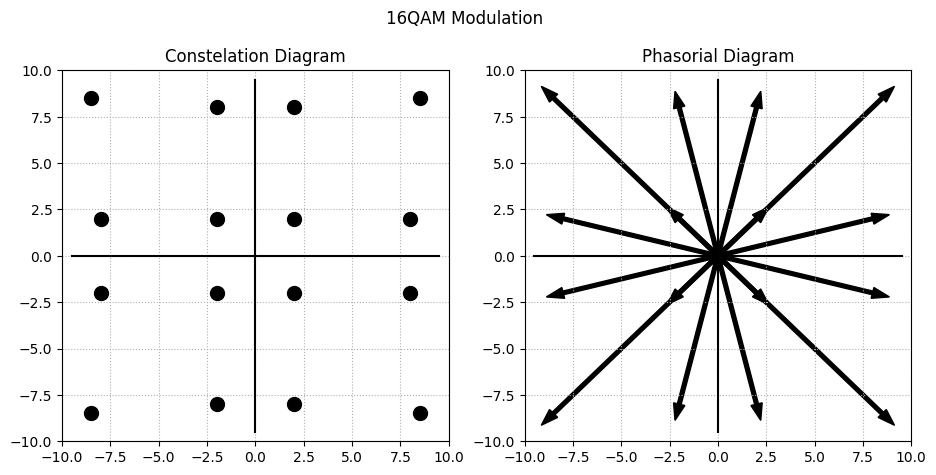

In [16]:
# 16QAM

from matplotlib import pyplot as plt
import numpy as np

plt.rcParams["figure.autolayout"] = True

x_values = [-9.5,-1,1,9.5]
y_values = [0]*4
points = [[2,2],
          [-2,2],
          [2,-2],
          [-2,-2],
          [2,8],
          [2,-8],
          [-2,8],
          [-2,-8],
          [8,2],
          [-8,2],
          [8,-2],
          [-8,-2],
          [8.5,8.5],
          [-8.5,8.5],
          [8.5,-8.5],
          [-8.5,-8.5]]

fig, axis = plt.subplots(1,2,sharex='col')
fig.suptitle('16QAM Modulation', fontsize=12)

axis[0].set_title('Constelation Diagram')
axis[0].set_xlim(-10, 10)
axis[0].set_ylim(-10, 10)    
axis[0].grid(linestyle='dotted')

for x in range(0,len(points),1):
  axis[0].plot(points[x][0],points[x][1], marker="o", markersize=10, color="black")

axis[0].plot(x_values,y_values, color="black")
axis[0].plot(y_values,x_values, color="black")

# Phasorial Diagram
axis[1].set_title('Phasorial Diagram')
axis[1].grid(linestyle='dotted')
axis[1].set_xlim(-10, 10)
axis[1].set_ylim(-10, 10)

for x in range(0,len(points),1):
  axis[1].arrow(0,0,points[x][0],points[x][1],width=0.2,color="black")

axis[1].plot(x_values,y_values, color="black")
axis[1].plot(y_values,x_values, color="black")

plt.rcParams['figure.figsize'] = [6.4 + 3, 4.8]


plt.show()